# **Proyecto Final**





*   **Nombre:** Esteban Araya
*   **Rol:** 202010524-3



<img src="https://camo.githubusercontent.com/cb1a8d0d2a46975160dbf2cf0ce8fd2c0b96ca5780c3de9e63bc9e9c51447723/68747470733a2f2f73746f726167652e676f6f676c65617069732e636f6d2f6b6167676c652d6d656469612f636f6d7065746974696f6e732f537061636573686970253230546974616e69632f6a6f656c2d66696c6970652d51776f4e4168626d4c4c6f2d756e73706c6173682e6a7067" width="480" height="360" align="center"/>

In [ ]:
#Librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import classification_report

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Creando Los Data Frame
sample_df = pd.read_csv("/content/drive/MyDrive/data_sets_proyecto/sample_submission.csv") #ejemplo de submission
test_df = pd.read_csv('/content/drive/MyDrive/data_sets_proyecto/test.csv') #datos para testear
train_df = pd.read_csv("/content/drive/MyDrive/data_sets_proyecto/train.csv") #datos para entrenar

## **Descripcion de los datas sets**



*   **train.csv**: Registros personales de aproximadamente dos tercios (~8700) de los pasajeros, que se utilizarán como datos de entrenamiento.
  *   `PassengerId`: Identificacion unica de cada pasajero Una identificación única para cada pasajero. Cada ID toma el formato ***gggg_pp*** donde ***gggg*** indica un grupo con el que viaja el pasajero y ***pp*** es su número dentro del grupo. Las personas de un grupo suelen ser miembros de la familia, pero no siempre.
  *   `HomePlanet`: El planeta del que partió el pasajero, normalmente su planeta de residencia permanente.
  * `CryoSleep`: Indica si el pasajero optó por ser puesto en animación suspendida durante la duración del viaje. Los pasajeros en CryoSleep están confinados en sus cabinas.
  * `Cabin`: El número de cabina donde se hospeda el pasajero. Toma el formato ***deck/num/side***, donde el lado puede ser P para Babor o S para Estribor.
  * `Destination`: El planeta al que desembarcará el pasajero.
  * `Age` : Edad del Pasajero.
  * `VIP` : Si el pasajero ha pagado por un servicio VIP especial durante el viaje.
  * `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` : Monto que el pasajero ha facturado en cada una de las muchas comodidades de lujo del Spaceship Titanic.
  * `Name`: Nombre y apellido de los pasajeros.
  * `Transported` : Si el pasajero fue transportado a otra dimensión. Este es el objetivo, la columna que intentas predecir.

* **test_csv**:  Registros personales del tercio restante (~4300) de los pasajeros, que se utilizarán como datos de prueba. Tu tarea es predecir el valor de Transportado para los pasajeros de este conjunto.
* **sample_submission.csv**:Un archivo de envío en el formato correcto.
  * `PassengerId`: Identificación para cada pasajera en el conjunto de prueba.
  * `Transported`: El objetivo. Para cada pasajero, predice Verdadero o Falso.

## **Estadistica Descriptiva**

In [ ]:
#Dimension de los data frame
print("dimension de train_df:",train_df.shape)
print("dimension de test_df:",test_df.shape)

dimension de train_df: (8693, 14)
dimension de test_df: (4277, 13)


In [ ]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
#Datos nulos por cada columna
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
#Veamos si existen datos duplicados
train_df.duplicated().sum()

0

In [ ]:
#Datos Nulos
train_df.Name.isna().sum()

200

In [ ]:
#Nombres duplicados
df1=train_df.copy()
df1.Name.dropna().duplicated().sum()

20

In [ ]:
#Cantidad de datos unicos por columna
train_df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [ ]:
#Tipo de dato en cada columna
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
#Descripcion estadistica de los datos
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## **Visualizacion de los Datos**

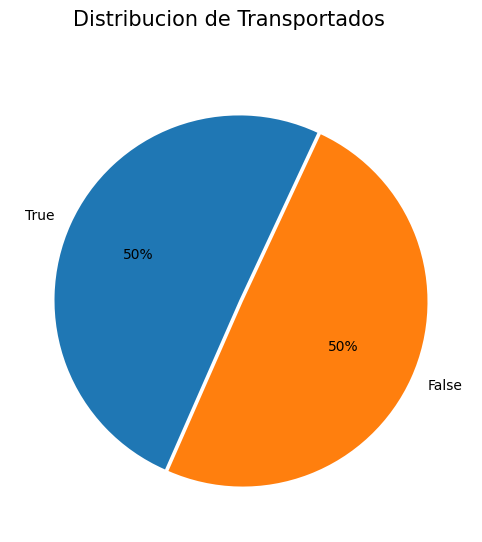

In [ ]:
fig, ax  = plt.subplots(figsize=(10, 6))
fig.suptitle('Distribucion de Transportados', size = 15)

explode = (0.01, 0.01)
labels = list(train_df['Transported'].value_counts().index)
sizes = train_df['Transported'].value_counts()
ax.pie(sizes, explode=explode, startangle=65, labels=labels,autopct='%1.0f%%', pctdistance=0.6)
ax.add_artist(plt.Circle((0,0),0,fc='white'))

plt.show()

Text(0, 0.5, 'Cantidad')

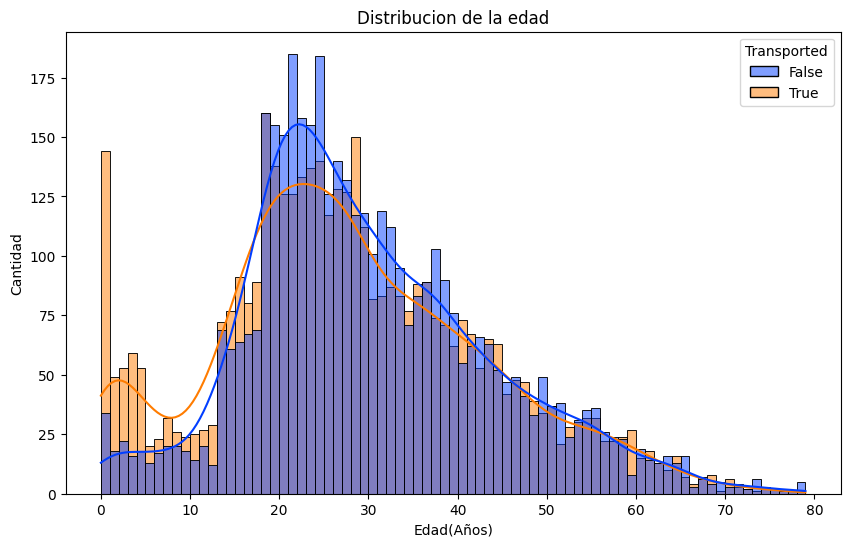

In [ ]:
#Grafico de la edad de los pasajeros.
plt.figure(figsize=(10,6))

# Histograma
sns.histplot(data=train_df, x='Age', hue='Transported',palette= 'bright', binwidth=1, kde=True)

plt.title('Distribucion de la edad')
plt.xlabel('Edad(Años)')
plt.ylabel('Cantidad')

Notemos que los pasajero de menor o igual a 18 a;os los que mas fueron transportado a otra dimension
entre 19 y 34 son los menos transportados, a exepcion de 29 a;os
luego los sobre 35 a;os tienen la misma probabilidad de ser transportados a otra dimension


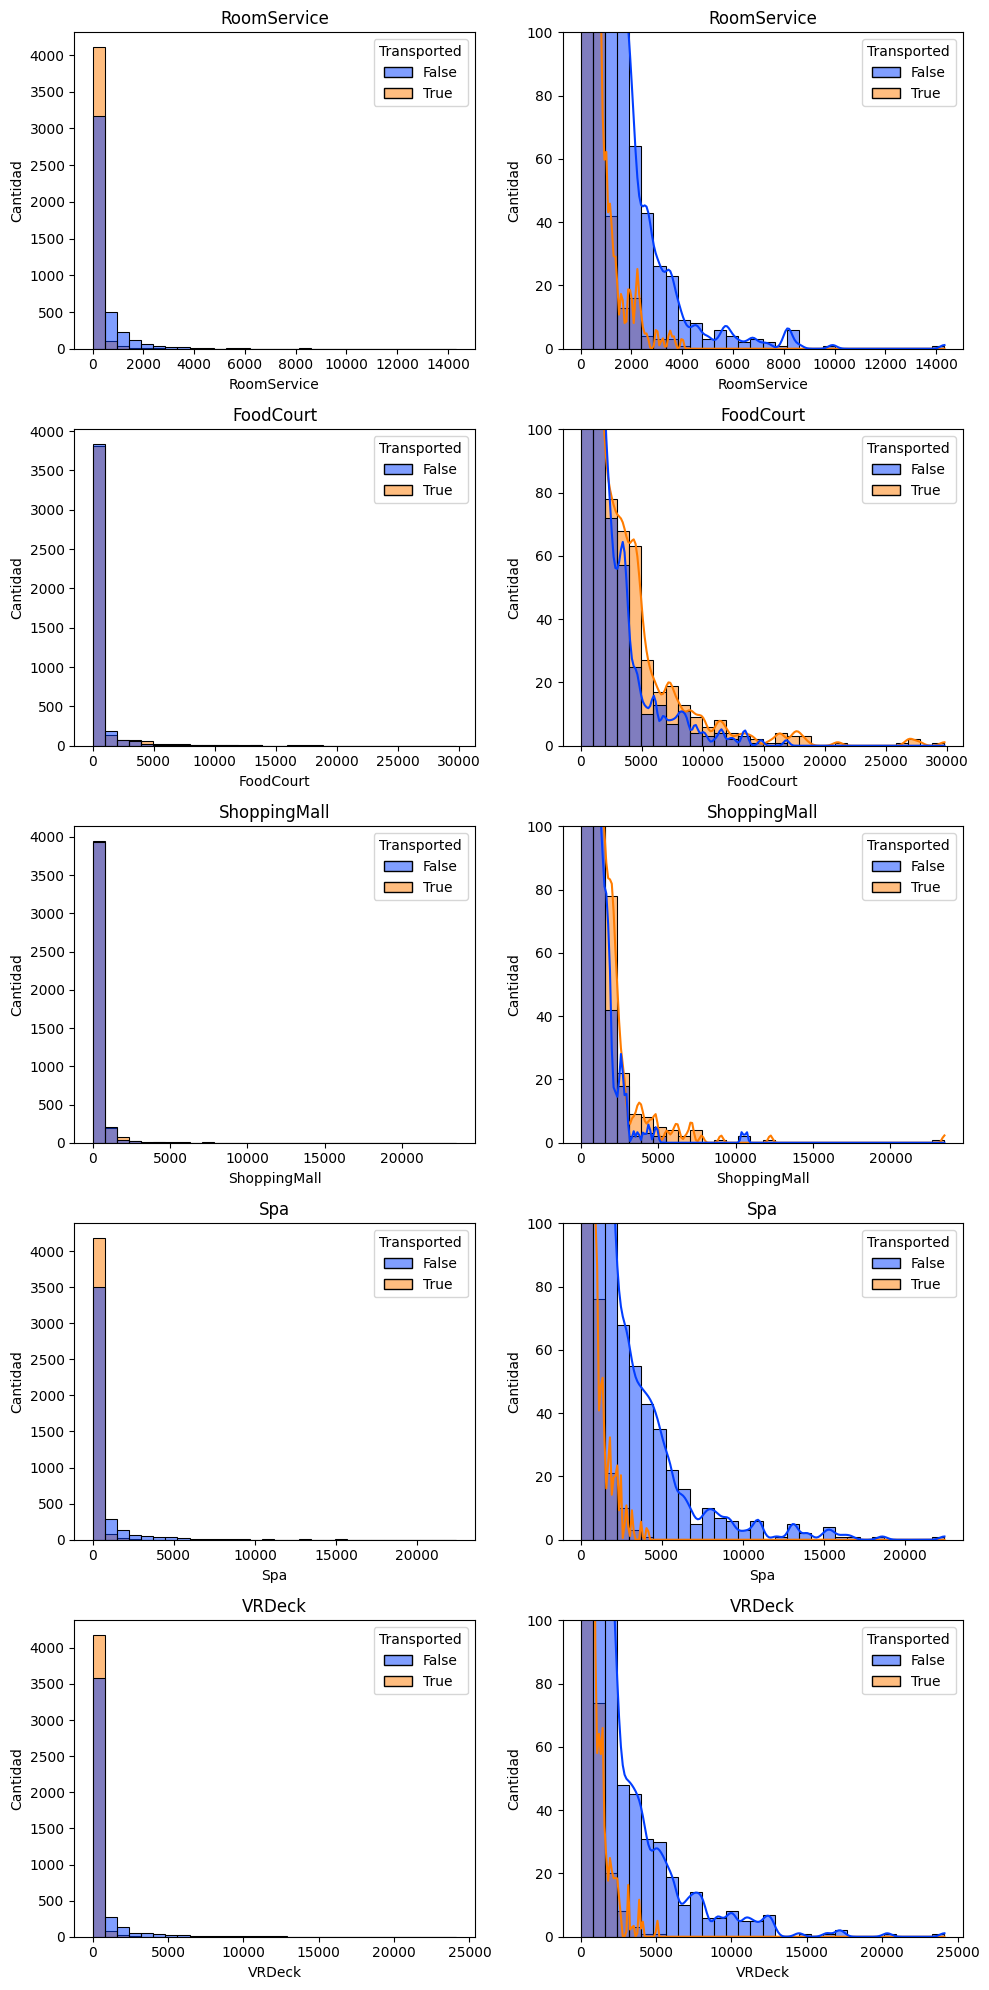

In [ ]:
#Graficos de los servicios
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Plot izquierda
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train_df, x=var_name, axes=ax,palette= 'bright', bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    plt.ylabel('Cantidad')

    # Plot derecha
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train_df, x=var_name, axes=ax,palette= 'bright', bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
    plt.ylabel('Cantidad')
fig.tight_layout()
plt.show()

* No se gasta dinero en servicios especiales
* Las personas mas transportadas a otra dimension son las que no gastan dinero en serivicios extras
*

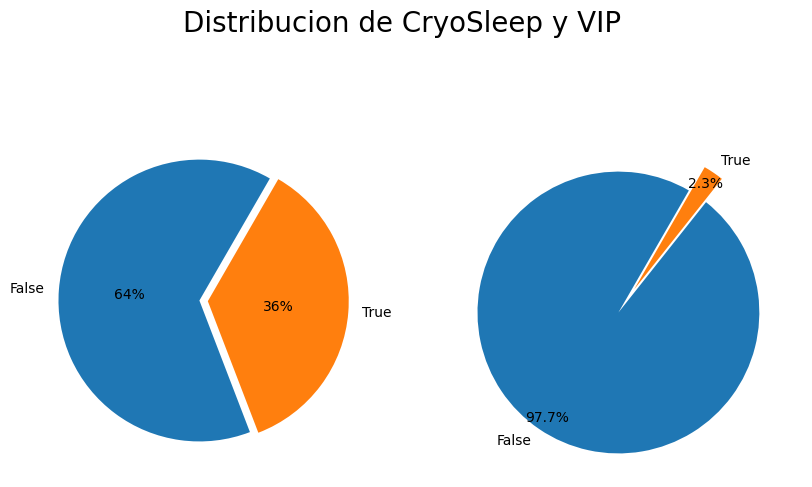

In [ ]:
#Grafico de CryoSleep y
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Distribucion de CryoSleep y VIP', size = 20)
axs = [ax1, ax2]

explode = (0.03, 0.03)
labels = list(train_df['CryoSleep'].value_counts().index)
sizes = train_df['CryoSleep'].value_counts()
ax1.pie(sizes, explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.5)
ax1.add_artist(plt.Circle((0,0),0,fc='white'))

explode = (0.1, 0.1)
labels = list(train_df['VIP'].value_counts().index)
sizes = train_df['VIP'].value_counts()
ax2.pie(sizes, explode=explode, startangle=60, labels=labels,autopct='%1.1f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0,fc='white'))

plt.show()

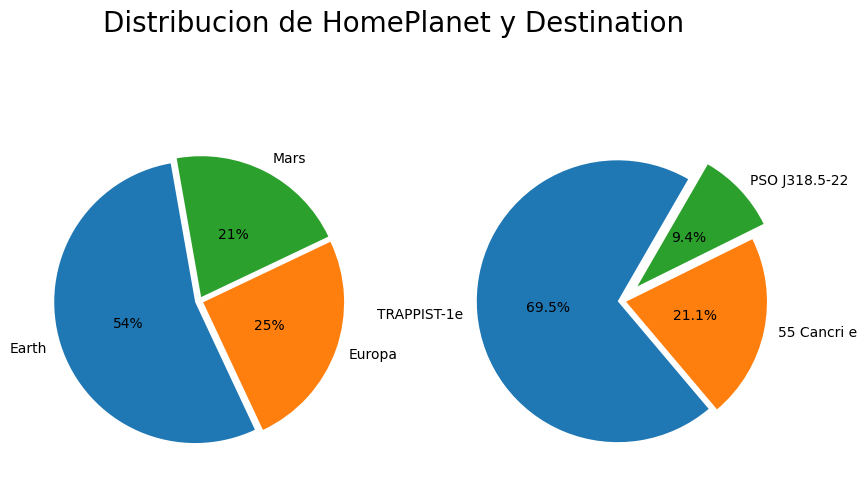

In [ ]:
#Grafico de HomePlanet y Destination
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Distribucion de HomePlanet y Destination ', size = 20)
axs = [ax1, ax2]

explode = (0.03, 0.03,0.03) #Separacion de cada variable en el grafico
labels = list(train_df['HomePlanet'].value_counts().index) #Lista de valores
sizes = train_df['HomePlanet'].value_counts() #Cantidad de cada variable
ax1.pie(sizes, explode=explode, startangle=100, labels=labels,autopct='%1.0f%%', pctdistance=0.5) #Strangle rotacion del grafico #autopact='%1.0f%%' porcentaje dentro de la cuña
ax1.add_artist(plt.Circle((0,0),0,fc='white'))

explode = (0.03, 0.03, 0.15) #Separacion de cada variable en el grafico
labels = list(train_df['Destination'].value_counts().index) #Lista de valores
sizes = train_df['Destination'].value_counts() #Cantidad de cada variable
ax2.pie(sizes, explode=explode, startangle=60, labels=labels,autopct='%1.1f%%', pctdistance=0.5) #pctdistance distancia de los porcentajes
ax2.add_artist(plt.Circle((0,0),0,fc='white')) #Grafico circular (donde queda el centro del circulo, tamaño, color)

plt.show()

Text(0, 0.5, 'Cantidad')

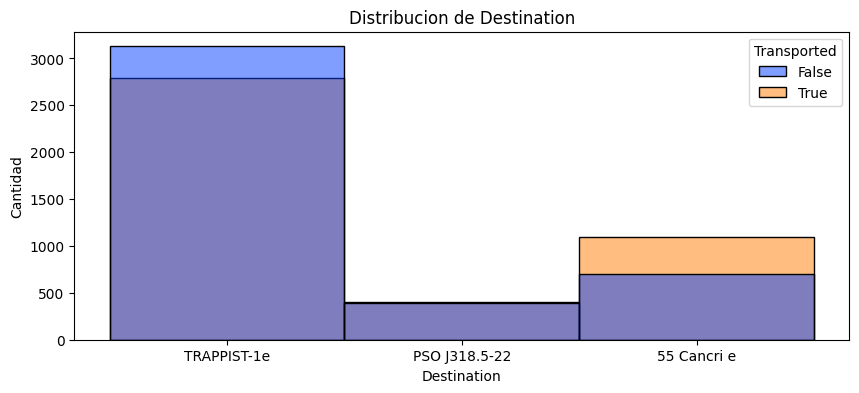

In [ ]:
#Grafico de la edad de los pasajeros.
plt.figure(figsize=(10,4))

# Histograma
sns.histplot(data=train_df, x='Destination', hue='Transported',palette= 'bright', binwidth=1)

plt.title('Distribucion de Destination')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

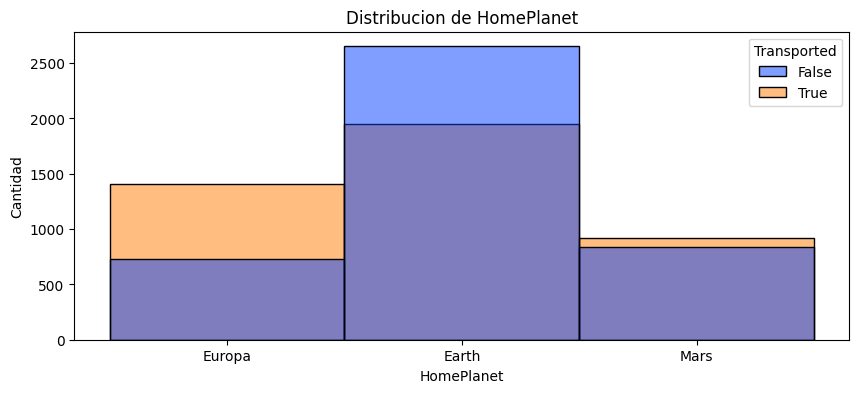

In [ ]:
#Grafico de la edad de los pasajeros.
plt.figure(figsize=(10,4))

# Histograma
sns.histplot(data=train_df, x='HomePlanet', hue='Transported',palette= 'bright', binwidth=1)

plt.title('Distribucion de HomePlanet')
plt.ylabel('Cantidad')

## **Procesamiento de Datos**

Nuestro objetivo es predicir que pasajeros son transportados y cuales no, para esto quitaremos todos lo datos que sean nulos

In [437]:
#Dejamos las columnas que brindan informacion y quitamos todos los datos nulos
train = train_df.drop(['PassengerId', 'Cabin','Name','CryoSleep','VIP',],axis =1).copy()
train = train.dropna()
train.head()

,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True
2,Europa,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True


## **Entrenamiento del Modelo**

In [ ]:
y=train['Transported'].copy().astype(int)
X=train.drop('Transported', axis=1).copy()

In [ ]:
# Indentify numerical and categorical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Scale numerical data to have mean=0 and variance=1
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode categorical data
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore',sparse=False))])

# Combine preprocessing
ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)],
        remainder='passthrough')

# Apply preprocessing
X = ct.fit_transform(X)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)

In [ ]:
# Classifiers
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "RandomForest" : RandomForestClassifier(random_state=0),
    "NaiveBayes": GaussianNB()
}

# Grids for grid search
LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [6, 8, 10, 12, 14]}

NB_grid={'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}

# Dictionary of all grids
grid = {
    "LogisticRegression" : LR_grid,
    "KNN" : KNN_grid,
    "RandomForest" : RF_grid,
    "NaiveBayes": NB_grid
}

In [ ]:
i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Entrenamiento y resultados
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_valid, y_valid)

    # Guardar el modelo
    clf_best_params[key]=clf.best_params_

    # Tiempo de entranamiento
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)

    print('Model:', key)
    print('Tiempo de entrenamiento (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

Model: LogisticRegression
Tiempo de entrenamiento (mins): 0.06

Model: KNN
Tiempo de entrenamiento (mins): 0.09

Model: RandomForest
Tiempo de entrenamiento (mins): 1.93

Model: NaiveBayes
Tiempo de entrenamiento (mins): 0.0



In [445]:
svc = SVC(kernel='linear', C=1.0)
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
clf_best_params #optimizacion de parametros

{'LogisticRegression': {'C': 0.25, 'max_iter': 50, 'penalty': 'l2'},
 'KNN': {'n_neighbors': 9, 'p': 2},
 'RandomForest': {'max_depth': 12, 'n_estimators': 250},
 'NaiveBayes': {'var_smoothing': 1e-10}}

In [444]:
predicciones = svc.predict(X_valid)
accuracy = accuracy_score(y_valid, predicciones)
print("Precisión en el conjunto de validación:", accuracy)

Precisión en el conjunto de validación: 0.7838023335621139


In [ ]:
valid_scores #resultados

,Classifer,Validation accuracy,Training time
0,LogisticRegression,0.790666,0.06
1,KNN,0.780371,0.09
2,RandomForest,0.795470,1.93
3,NaiveBayes,0.702128,0.00


## **Visualizacion del Modelo**

Notemos que el mejor modelo es el random forest

In [ ]:
RF =  RandomForestClassifier(max_depth = 12, n_estimators = 250 )

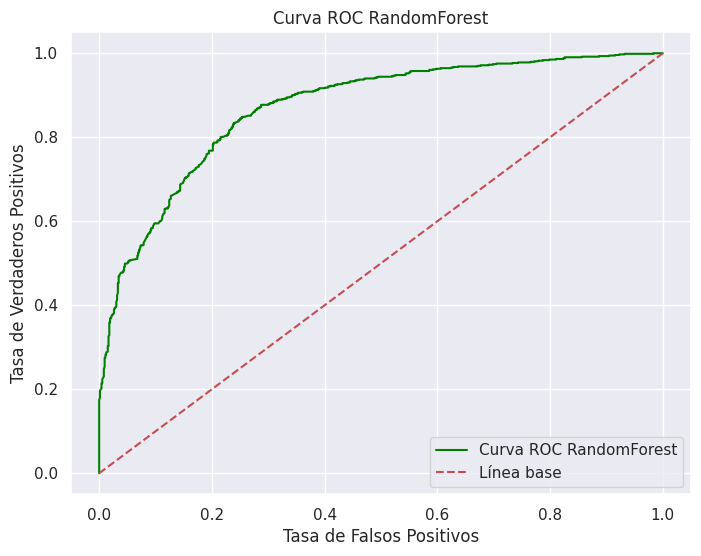

In [ ]:
RF.fit(X_train, y_train)

probs_positivas_RF = RF.predict_proba(X_valid)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr_rf, tpr_rf, umbrales_rf = roc_curve(y_valid, probs_positivas_RF)

# Graficar la curva ROC para RandomForest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf,color='green' ,label='Curva ROC RandomForest')
plt.plot([0, 1], [0, 1], 'r--', label='Línea base')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC RandomForest')
plt.legend()
plt.show()


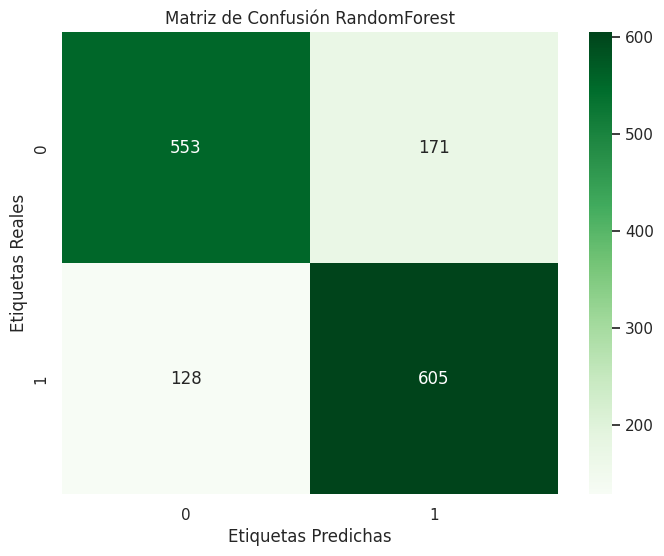

In [446]:
predicciones_rf = RF.predict(X_valid)

matriz_confusion_RF = confusion_matrix(y_valid, predicciones_rf)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_RF, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión RandomForest')
plt.show()

In [ ]:
print("Reporte de Clasificación:\n", classification_report(y_valid, predicciones_rf))

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.81      0.76      0.79       724
           1       0.78      0.83      0.80       733

    accuracy                           0.79      1457
   macro avg       0.80      0.79      0.79      1457
weighted avg       0.80      0.79      0.79      1457



## **Conclusiones**

Los resultados del modelo son bastantes buenas, pero se pueden seguir mejorando, ya sea entrenandolo con mas datos, reemplazando los valores nulos por valores que estan en la media. Tambien podemos usar otros modelos que sean mejor para este tipo de casos